Scrip made to detect, from a hVCF file coming from PHGv2, merging the whole pangenome, the % of "core ranges" and "unique ranges"

functions may be increased in the future.
It only requires the mentioned hVCF, and indicate the number of 

In [30]:
def AmIaNotebook():
    try:
        shell = get_ipython().__class__.__name__
        if shell == 'ZMQInteractiveShell':
            return True  # Jupyter notebook or qtconsole
        elif shell == 'TerminalInteractiveShell':
            return False  # Terminal running IPython
        else:
            return False  # Other type of environment
    except NameError:
        return False  # Not in an interactive environment

#Check if the name of this file ends with .py or with .ipynb

In [31]:
def NumberOfGenomes (hvcf_file):

    with open(hvcf_file, 'r') as hvcf:
        lines = hvcf.readlines()
        num_of_genomes = 0
        for line in lines:
            if line.startswith('#'):
                continue
            else: 
                line = line.strip()
                line = line.split('\t')
                keys = line[4].split(',')
                if len(keys) > num_of_genomes:
                    num_of_genomes = len(keys)
                #save max value of length of keys

    return num_of_genomes


                

In [32]:
def DetermineCoreRanges(hvcf_file):

    num_of_genomes = NumberOfGenomes(hvcf_file)

    genome_numbers = list(range(1, num_of_genomes + 1))

    print(genome_numbers)

    with open(hvcf_file, 'r') as hvcf:
        lines = hvcf.readlines()
        total_ranges = 0
        core_ranges = 0
        unic_ranges = 0

        for line in lines:
            if line.startswith('#'):
                continue
            else: 
                total_ranges += 1
                line = line.strip()
                line = line.split('\t')
                keys = line[4].split(',')
                if len(keys) == num_of_genomes:
                    core_ranges += 1
                if len(keys) == 1:
                    unic_ranges += 1
                    

        print("\n")
        print("here you have the whole summary:\n ")

    with open(hvcf_file, 'r') as hvcf:
        lines = hvcf.readlines()
        accesion_count = 0
        dict_ranges_count = {}
        for genome_number in genome_numbers:
            #print(f'Number of genomes: {genome_number}')
            count = 0

            for line in lines:
                if line.startswith('#'):
                    continue
                else:
                    line = line.split('\t')
                    keys = line[4].split(',')
                    #print(keys)
                    #print(len(keys))
                    #print(genome_number)
                    if len(keys) == genome_number:
                        count += 1

            if genome_number is not 1 and genome_number is not num_of_genomes:
                accesion_count += count

            dict_ranges_count[genome_number] = count


            print(f'Number of ranges with {genome_number} genomes: {count}')

        print('\nTotal number of ranges: ', total_ranges)
        print('\nNumber of genomes: ', num_of_genomes)
        print('Number of core ranges: ', core_ranges)
        print("Number of accesion genes are: ", accesion_count)
        print('Number of unique ranges: ', unic_ranges)

    #print("\nThe sum of core, unique and accesion ranges is:")
    #print(core_ranges + unic_ranges + accesion_count)
    
    if total_ranges != core_ranges + unic_ranges + accesion_count:
        raise ValueError('The sum of core, unique and accesion ranges does not match the total number of ranges')

    return total_ranges, unic_ranges, core_ranges, accesion_count, dict_ranges_count

<>:52: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:52: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/tmp/ipykernel_700329/3300706836.py:52: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if genome_number is not 1 and genome_number is not num_of_genomes:


In [33]:
#lets plot it

def plot_pangenome_ranges_intersection(hvcf_file):

    total_ranges, unic_ranges, core_ranges, accesion_count, dict_ranges_count = DetermineCoreRanges(hvcf_file)
    num_of_genomes = NumberOfGenomes(hvcf_file)

    labels = 'Core', 'Unique', 'Accesion'
    sizes = [core_ranges, unic_ranges, accesion_count]
    colors = ['gold', 'yellowgreen', 'lightcoral']
    explode = (0.1, 0, 0)  # explode 1st slice

    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

    plt.axis('equal')
    plt.savefig(f'{hvcf_file}_1.png')
    plt.show()

    #get a subplot for accesion genes

    fig, ax = plt.subplots()
    ax.bar(dict_ranges_count.keys(), dict_ranges_count.values())
    ax.set_xlabel('Number of genomes')
    ax.set_ylabel('Number of ranges')
    ax.set_title('Pangenome ranges')
    #set color of first value to yellow, then green and last one red
    ax.get_children()[0].set_color('yellowgreen')
    for i in range(1, num_of_genomes):
        ax.get_children()[i].set_color('lightcoral')
    ax.get_children()[(num_of_genomes) -1].set_color('gold')
    ax.set_xticks(list(dict_ranges_count.keys()))
    ax.set_xticklabels(list(dict_ranges_count.keys()))

    plt.savefig(f'{hvcf_file}_2.png')
    plt.show()
    print(f'The plot has been saved as a png file as {hvcf_file}_1.png and {hvcf_file}_2.png')


In [34]:
import os
import matplotlib.pyplot as plt
import argparse
import sys

def ___main___():
    if AmIaNotebook() == False:
        parser = argparse.ArgumentParser(description=___main___.__doc__)
        parser.add_argument('--pangenome-hvcf', '-hvcf', help='Input hvcf file', required=True)
        args = parser.parse_args()

        hvcf_file = args.pangenome_hvcf

    else:
        hvcf_file = "/scratch/PHG/output/vcf_files/merged_hvcfs_19092024.h.vcf"

    plot_pangenome_ranges_intersection(hvcf_file)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


here you have the whole summary:
 
Number of ranges with 1 genomes: 815
Number of ranges with 2 genomes: 1415
Number of ranges with 3 genomes: 2607
Number of ranges with 4 genomes: 4357
Number of ranges with 5 genomes: 5775
Number of ranges with 6 genomes: 6277
Number of ranges with 7 genomes: 5980
Number of ranges with 8 genomes: 5132
Number of ranges with 9 genomes: 4413
Number of ranges with 10 genomes: 4615
Number of ranges with 11 genomes: 24317

Total number of ranges:  65703

Number of genomes:  11
Number of core ranges:  24317
Number of accesion genes are:  40571
Number of unique ranges:  815


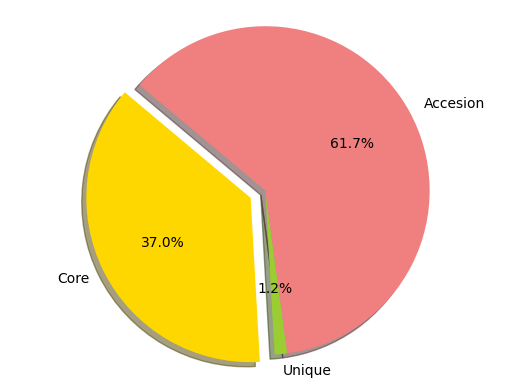

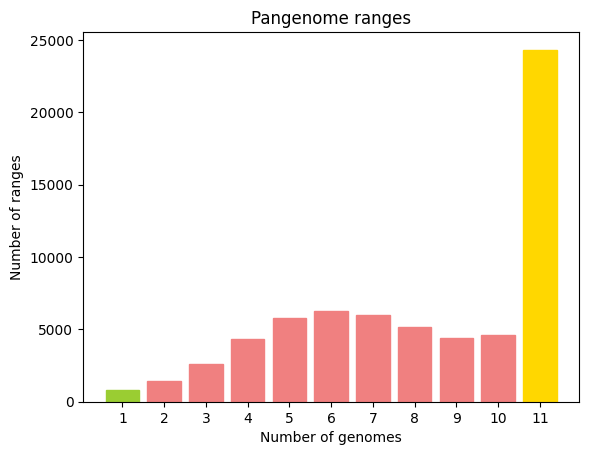

The plot has been saved as a png file as /scratch/PHG/output/vcf_files/merged_hvcfs_19092024.h.vcf_1.png and /scratch/PHG/output/vcf_files/merged_hvcfs_19092024.h.vcf_2.png


In [35]:
if __name__ == "__main__":
        try:
            ___main___()    
        except KeyboardInterrupt:
            print("Script interrupted by user. Exiting...")
            sys.exit(0)
            raise KeyboardInterrupt